In [1]:
import pandas as pd
import numpy as np



In [3]:
beml_df = pd.read_csv("BEML_norm.csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [4]:
glaxo_df = pd.read_csv("GLAXO_Norm.csv")
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [5]:
beml_df = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [6]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
5,2010-01-11,1137.00
6,2010-01-12,1143.65
7,2010-01-13,1142.25
8,2010-01-14,1148.20
9,2010-01-15,1207.05


In [7]:
'''The DataFrames have a date column, so we can
create a DatetimeIndex index from this column Date. It will ensure that the rows are sorted by time in
ascending order.'''
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

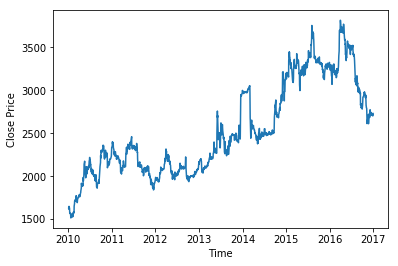

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

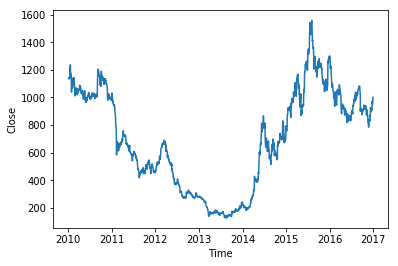

In [9]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [10]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [11]:
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

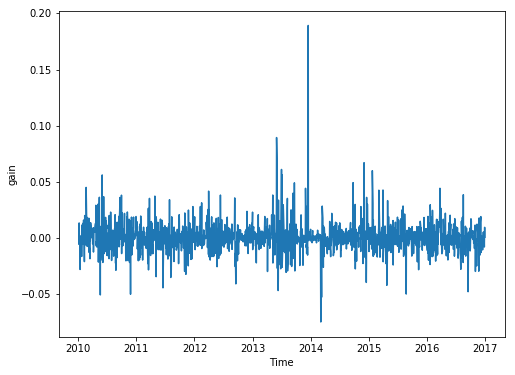

In [12]:
#Plot the gains
plt.figure(figsize = (8, 6));
plt.plot(glaxo_df.index, glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


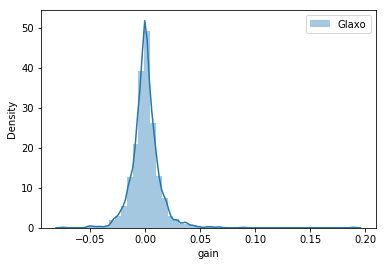

In [13]:
sn.distplot(glaxo_df.gain, label = 'Glaxo');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

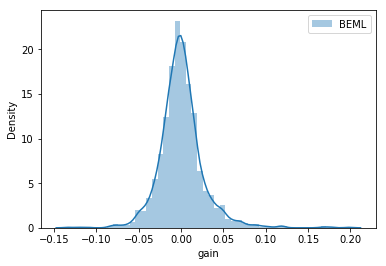

In [14]:
sn.distplot(beml_df.gain, label = 'BEML');
plt.xlabel('gain');
plt.ylabel('Density');
plt.legend();

In [15]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [16]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


In [17]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.06352488667177397

In [18]:
#Probability of making 2% gain or higher in Glaxo
1 - stats.norm.cdf(0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.07104511457618568

### Inclass Exercise

### Compute 2% loss or gain for BEML

In [ ]:
#Probability of making 2% gain or higher in BEML
1 - stats.norm.cdf(0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22769829484075343